**EDA on the runtime DeltaIoT V1 data**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
from statistics import median
from statistics import mode

In [3]:
data = pd.read_csv('merged/merged_results_v1.csv')
data

,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption
0,"[2, 0, 0, -1, -5, 0, -2, 0, 0, 0, 2, 0, -6, 2,...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 0, 100, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",8.507650,3.693500,12.8240
1,"[2, 0, 0, -1, -5, 0, -2, 0, 0, 0, 2, 0, -6, 2,...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 20, 80, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",6.985480,1.486880,12.8581
2,"[2, 0, 0, -1, -5, 0, -2, 0, 0, 0, 2, 0, -6, 2,...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 40, 60, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",6.387335,0.422222,12.8773
3,"[2, 0, 0, -1, -5, 0, -2, 0, 0, 0, 2, 0, -6, 2,...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 60, 40, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",6.138290,0.000000,12.8961
4,"[2, 0, 0, -1, -5, 0, -2, 0, 0, 0, 2, 0, -6, 2,...","[0, 7, 15, 15, 15, 13, 15, 9, 15, 15, 15, 11, ...","[100, 100, 100, 100, 100, 80, 20, 100, 100, 0,...","[50, 100, 50, 50, 100, 50, 50, 100, 20, 50, 50...",5.638625,0.000000,12.9143
...,...,...,...,...,...,...,...
64795,"[3, 0, 0, -1, -4, 0, -2, 0, 0, 0, 2, 0, -6, 3,...","[0, 7, 15, 15, 15, 12, 15, 9, 14, 15, 14, 11, ...","[100, 100, 100, 100, 100, 100, 0, 100, 100, 10...","[50, 100, 50, 50, 100, 50, 50, 100, 0, 50, 50,...",7.013020,0.444444,12.8766
64796,"[3, 0, 0, -1, -4, 0, -2, 0, 0, 0, 2, 0, -6, 3,...","[0, 7, 15, 15, 15, 12, 15, 9, 14, 15, 14, 11, ...","[100, 100, 100, 100, 100, 100, 0, 100, 100, 10...","[50, 100, 50, 50, 100, 50, 50, 100, 0, 50, 50,...",8.960050,1.145300,12.9349
64797,"[3, 0, 0, -1, -4, 0, -2, 0, 0, 0, 2, 0, -6, 3,...","[0, 7, 15, 15, 15, 12, 15, 9, 14, 15, 14, 11, ...","[100, 100, 100, 100, 100, 100, 0, 100, 100, 10...","[50, 100, 50, 50, 100, 50, 50, 100, 0, 50, 50,...",8.722520,2.592230,12.9527
64798,"[3, 0, 0, -1, -4, 0, -2, 0, 0, 0, 2, 0, -6, 3,...","[0, 7, 15, 15, 15, 12, 15, 9, 14, 15, 14, 11, ...","[100, 100, 100, 100, 100, 100, 0, 100, 100, 10...","[50, 100, 50, 50, 100, 50, 50, 100, 0, 50, 50,...",11.450200,7.882080,12.9872


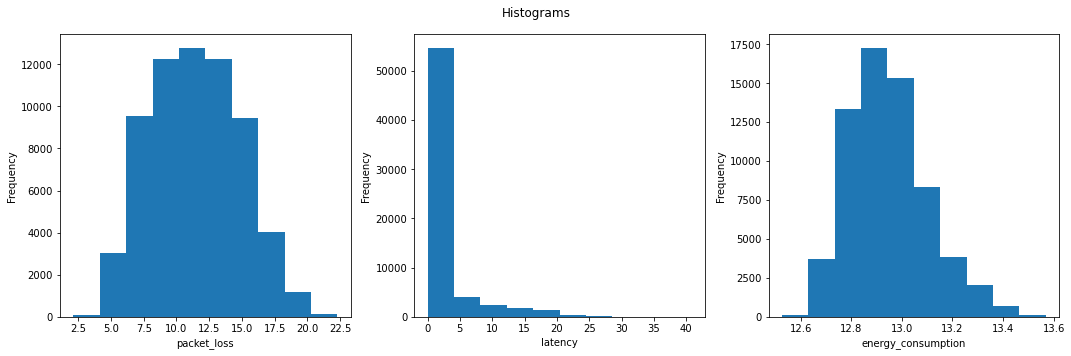

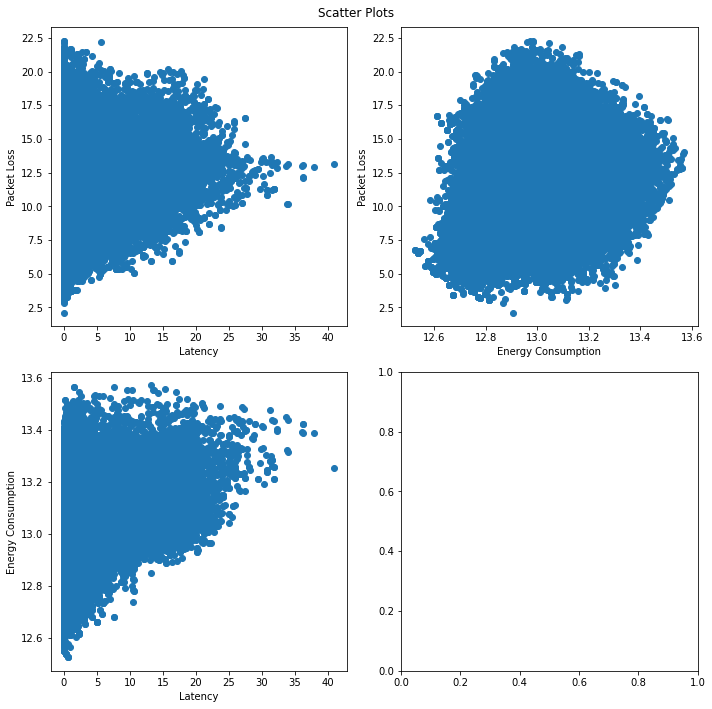

In [53]:
data = pd.read_csv('merged/merged_results_v1.csv')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Histograms')

columns = ['packet_loss', 'latency', 'energy_consumption']

for i, column in enumerate(columns):
    axes[i].hist(data[column], bins=10)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Scatter Plots')

axes[0, 0].scatter(data['latency'], data['packet_loss'])
axes[0, 0].set_xlabel('Latency')
axes[0, 0].set_ylabel('Packet Loss')

axes[0, 1].scatter(data['energy_consumption'], data['packet_loss'])
axes[0, 1].set_xlabel('Energy Consumption')
axes[0, 1].set_ylabel('Packet Loss')

axes[1, 0].scatter(data['latency'], data['energy_consumption'])
axes[1, 0].set_xlabel('Latency')
axes[1, 0].set_ylabel('Energy Consumption')

plt.tight_layout()
plt.show()


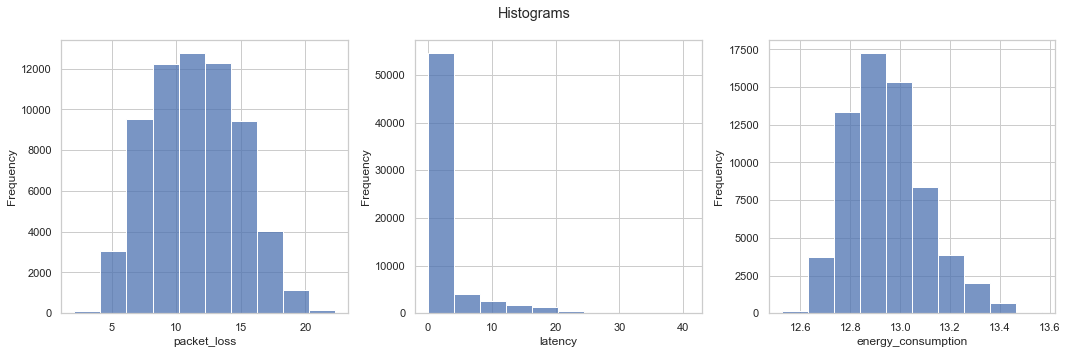

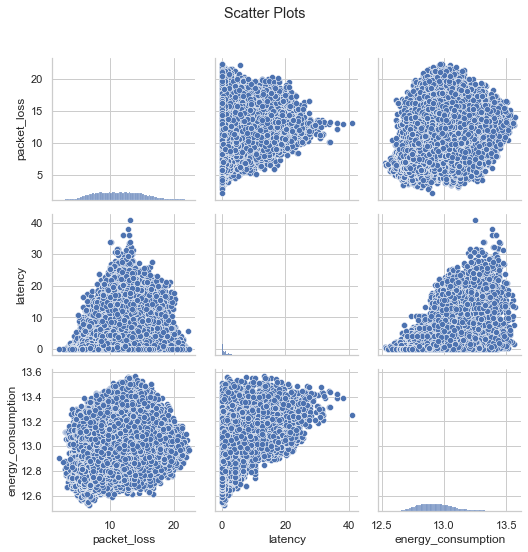

In [73]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Histograms')

columns = ['packet_loss', 'latency', 'energy_consumption']

for i, column in enumerate(columns):
    sns.histplot(data[column], ax=axes[i], bins=10)
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
sns.pairplot(data[columns])
plt.suptitle('Scatter Plots', y=1.02)
plt.tight_layout()
plt.show()


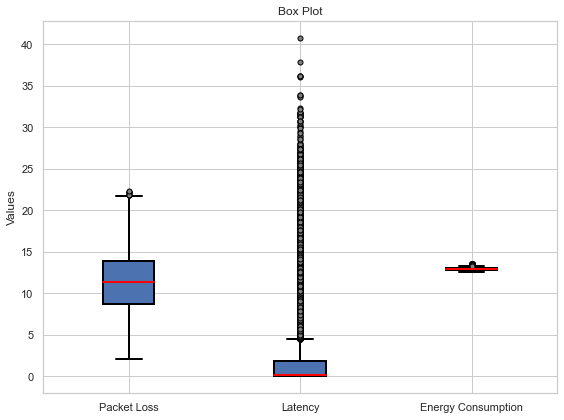

In [57]:
box_plot_data = [data['packet_loss'], data['latency'], data['energy_consumption']]
labels = ['Packet Loss', 'Latency', 'Energy Consumption']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
fig, ax = plt.subplots(figsize=(8, 6))

boxprops = dict(linewidth=2, color='black')
medianprops = dict(linewidth=2, color='red')
capprops = dict(linewidth=2, color='black')
whiskerprops = dict(linewidth=2, color='black')
flierprops = dict(marker='o', markersize=5, markerfacecolor='grey', markeredgecolor='black')

ax.boxplot(box_plot_data, labels=labels, patch_artist=True, boxprops=boxprops, medianprops=medianprops,
            capprops=capprops, whiskerprops=whiskerprops, flierprops=flierprops)

ax.set_ylabel('Values')
ax.set_title('Box Plot')

plt.tight_layout()

output_file_path = 'box_plot.png'
plt.savefig(output_file_path, dpi=300)

plt.show()


In [58]:
data.drop(['motes_snr', 'motes_power', 'motes_packet_distribution', 'motes_load'],  axis=1)

,packet_loss,latency,energy_consumption
0,8.507650,3.693500,12.8240
1,6.985480,1.486880,12.8581
2,6.387335,0.422222,12.8773
3,6.138290,0.000000,12.8961
4,5.638625,0.000000,12.9143
...,...,...,...
64795,7.013020,0.444444,12.8766
64796,8.960050,1.145300,12.9349
64797,8.722520,2.592230,12.9527
64798,11.450200,7.882080,12.9872


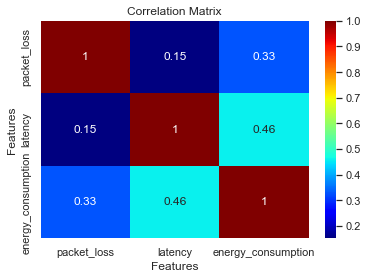

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='jet')
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

In [121]:
df.describe()

,packet_loss,latency,energy_consumption
count,64800.000000,64800.000000,64800.000000
mean,11.422598,2.168793,12.945894
std,3.377148,4.426123,0.154682
min,2.122195,0.000000,12.524700
25%,8.747545,0.000000,12.831500
50%,11.354100,0.200000,12.929750
75%,13.958900,1.818440,13.037200
max,22.283550,40.817000,13.569500


In [60]:
df = pd.read_csv('merged/merged_results_v1.csv')

object_columns = ['motes_snr', 'motes_power', 'motes_packet_distribution', 'motes_load']

for col in object_columns:
    # convert the string representation of lists into actual lists
    df[col] = df[col].apply(ast.literal_eval)
    # replace each list with its mean
    df[col] = df[col].apply(lambda x: np.mean(x))

df


,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption
0,-0.647059,12.882353,82.352941,58.571429,8.507650,3.693500,12.8240
1,-0.647059,12.882353,82.352941,58.571429,6.985480,1.486880,12.8581
2,-0.647059,12.882353,82.352941,58.571429,6.387335,0.422222,12.8773
3,-0.647059,12.882353,82.352941,58.571429,6.138290,0.000000,12.8961
4,-0.647059,12.882353,82.352941,58.571429,5.638625,0.000000,12.9143
...,...,...,...,...,...,...,...
64795,-0.470588,12.647059,82.352941,57.142857,7.013020,0.444444,12.8766
64796,-0.470588,12.647059,82.352941,57.142857,8.960050,1.145300,12.9349
64797,-0.470588,12.647059,82.352941,57.142857,8.722520,2.592230,12.9527
64798,-0.470588,12.647059,82.352941,57.142857,11.450200,7.882080,12.9872


In [61]:
df.describe().round(2)

,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption
count,64800.00,64800.00,64800.00,64800.00,64800.00,64800.00,64800.00
mean,-0.74,12.73,82.35,58.56,11.42,2.17,12.95
std,0.23,0.27,0.00,2.29,3.38,4.43,0.15
min,-1.76,11.94,82.35,57.14,2.12,0.00,12.52
25%,-0.88,12.53,82.35,57.14,8.75,0.00,12.83
50%,-0.71,12.76,82.35,57.14,11.35,0.20,12.93
75%,-0.53,12.94,82.35,59.07,13.96,1.82,13.04
max,-0.12,13.35,82.35,67.14,22.28,40.82,13.57


In [62]:
mean_snr = df['motes_snr'].mean()
std_snr = df['motes_snr'].std()

df['motes_snr_classification_std'] = df['motes_snr'].apply(lambda x: 'high' if x > mean_snr + std_snr else ('low' if x < mean_snr - std_snr else 'medium'))
df


,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption,motes_snr_classification_std
0,-0.647059,12.882353,82.352941,58.571429,8.507650,3.693500,12.8240,medium
1,-0.647059,12.882353,82.352941,58.571429,6.985480,1.486880,12.8581,medium
2,-0.647059,12.882353,82.352941,58.571429,6.387335,0.422222,12.8773,medium
3,-0.647059,12.882353,82.352941,58.571429,6.138290,0.000000,12.8961,medium
4,-0.647059,12.882353,82.352941,58.571429,5.638625,0.000000,12.9143,medium
...,...,...,...,...,...,...,...,...
64795,-0.470588,12.647059,82.352941,57.142857,7.013020,0.444444,12.8766,high
64796,-0.470588,12.647059,82.352941,57.142857,8.960050,1.145300,12.9349,high
64797,-0.470588,12.647059,82.352941,57.142857,8.722520,2.592230,12.9527,high
64798,-0.470588,12.647059,82.352941,57.142857,11.450200,7.882080,12.9872,high


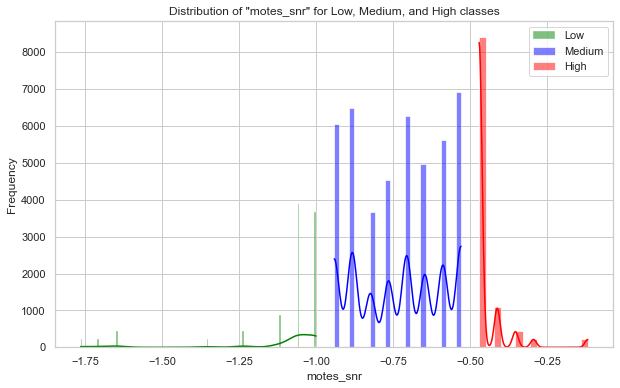

In [63]:
df_low = df[df['motes_snr_classification_std'] == 'low']
df_medium = df[df['motes_snr_classification_std'] == 'medium']
df_high = df[df['motes_snr_classification_std'] == 'high']
plt.figure(figsize=(10, 6))

sns.histplot(df_low['motes_snr'], color='green', kde=True, label='Low')
sns.histplot(df_medium['motes_snr'], color='blue', kde=True, label='Medium')
sns.histplot(df_high['motes_snr'], color='red', kde=True, label='High')

plt.title('Distribution of "motes_snr" for Low, Medium, and High classes')
plt.xlabel('motes_snr')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [64]:
class_counts = df['motes_snr_classification_std'].value_counts()
print(class_counts)
class_proportions = df['motes_snr_classification_std'].value_counts(normalize=True)
print(class_proportions)



medium    44496
high      10368
low        9936
Name: motes_snr_classification_std, dtype: int64
medium    0.686667
high      0.160000
low       0.153333
Name: motes_snr_classification_std, dtype: float64


In [65]:
low_min = df_low['motes_snr'].min()
low_max = df_low['motes_snr'].max()

medium_min = df_medium['motes_snr'].min()
medium_max = df_medium['motes_snr'].max()

high_min = df_high['motes_snr'].min()
high_max = df_high['motes_snr'].max()

print(f"'Low' class range: {low_min} to {low_max}")
print(f"'Medium' class range: {medium_min} to {medium_max}")
print(f"'High' class range: {high_min} to {high_max}")


'Low' class range: -1.7647058823529411 to -1.0
'Medium' class range: -0.9411764705882353 to -0.5294117647058824
'High' class range: -0.47058823529411764 to -0.11764705882352941


In [66]:
df.describe().round(2) #Number of motes 15

,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption
count,64800.00,64800.00,64800.00,64800.00,64800.00,64800.00,64800.00
mean,-0.74,12.73,82.35,58.56,11.42,2.17,12.95
std,0.23,0.27,0.00,2.29,3.38,4.43,0.15
min,-1.76,11.94,82.35,57.14,2.12,0.00,12.52
25%,-0.88,12.53,82.35,57.14,8.75,0.00,12.83
50%,-0.71,12.76,82.35,57.14,11.35,0.20,12.93
75%,-0.53,12.94,82.35,59.07,13.96,1.82,13.04
max,-0.12,13.35,82.35,67.14,22.28,40.82,13.57


In [67]:
df['motes_snr'] = df['motes_snr'].apply(lambda x: max(set(ast.literal_eval(x)), key=ast.literal_eval(x).count) if isinstance(x, str) else x)
df['motes_power'] = df['motes_power'].apply(lambda x: max(set(ast.literal_eval(x)), key=ast.literal_eval(x).count) if isinstance(x, str) else x)
df['motes_packet_distribution'] = df['motes_packet_distribution'].apply(lambda x: max(set(ast.literal_eval(x)), key=ast.literal_eval(x).count) if isinstance(x, str) else x)
df['motes_load'] = df['motes_load'].apply(lambda x: max(set(ast.literal_eval(x)), key=ast.literal_eval(x).count) if isinstance(x, str) else x)

# Calculate the mean for each column
mean_values = df.mean()

mean_values

/var/folders/cv/d0grnf5165l1mj138gt00dsm0000gn/T/ipykernel_15680/678874517.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



motes_snr                    -0.743725
motes_power                  12.734510
motes_packet_distribution    82.352941
motes_load                   58.558571
packet_loss                  11.422598
latency                       2.168793
energy_consumption           12.945894
dtype: float64

In [68]:
df.describe()

,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption
count,64800.000000,64800.000000,6.480000e+04,64800.000000,64800.000000,64800.000000,64800.000000
mean,-0.743725,12.734510,8.235294e+01,58.558571,11.422598,2.168793,12.945894
std,0.233940,0.272987,3.599637e-11,2.285257,3.377148,4.426123,0.154682
min,-1.764706,11.941176,8.235294e+01,57.142857,2.122195,0.000000,12.524700
25%,-0.882353,12.529412,8.235294e+01,57.142857,8.747545,0.000000,12.831500
50%,-0.705882,12.764706,8.235294e+01,57.142857,11.354100,0.200000,12.929750
75%,-0.529412,12.941176,8.235294e+01,59.071429,13.958900,1.818440,13.037200
max,-0.117647,13.352941,8.235294e+01,67.142857,22.283550,40.817000,13.569500


In [69]:
df['motes_snr'] = df['motes_snr'].apply(lambda x: sum(ast.literal_eval(x)) / len(ast.literal_eval(x)) if isinstance(x, str) else x)
df['motes_power'] = df['motes_power'].apply(lambda x: sum(ast.literal_eval(x)) / len(ast.literal_eval(x)) if isinstance(x, str) else x)
df['motes_packet_distribution'] = df['motes_packet_distribution'].apply(lambda x: sum(ast.literal_eval(x)) / len(ast.literal_eval(x)) if isinstance(x, str) else x)
df['motes_load'] = df['motes_load'].apply(lambda x: sum(ast.literal_eval(x)) / len(ast.literal_eval(x)) if isinstance(x, str) else x)
df

,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption,motes_snr_classification_std
0,-0.647059,12.882353,82.352941,58.571429,8.507650,3.693500,12.8240,medium
1,-0.647059,12.882353,82.352941,58.571429,6.985480,1.486880,12.8581,medium
2,-0.647059,12.882353,82.352941,58.571429,6.387335,0.422222,12.8773,medium
3,-0.647059,12.882353,82.352941,58.571429,6.138290,0.000000,12.8961,medium
4,-0.647059,12.882353,82.352941,58.571429,5.638625,0.000000,12.9143,medium
...,...,...,...,...,...,...,...,...
64795,-0.470588,12.647059,82.352941,57.142857,7.013020,0.444444,12.8766,high
64796,-0.470588,12.647059,82.352941,57.142857,8.960050,1.145300,12.9349,high
64797,-0.470588,12.647059,82.352941,57.142857,8.722520,2.592230,12.9527,high
64798,-0.470588,12.647059,82.352941,57.142857,11.450200,7.882080,12.9872,high


In [70]:
correlation_matrix = df.corr()

for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        print(f"{correlation_matrix.columns[i]} vs {correlation_matrix.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")
    print()


motes_snr vs motes_snr: 1.00
motes_snr vs motes_power: -0.55
motes_snr vs motes_packet_distribution: nan
motes_snr vs motes_load: -0.03
motes_snr vs packet_loss: -0.38
motes_snr vs latency: -0.01
motes_snr vs energy_consumption: -0.08

motes_power vs motes_snr: -0.55
motes_power vs motes_power: 1.00
motes_power vs motes_packet_distribution: nan
motes_power vs motes_load: -0.15
motes_power vs packet_loss: 0.35
motes_power vs latency: -0.04
motes_power vs energy_consumption: -0.03

motes_packet_distribution vs motes_snr: nan
motes_packet_distribution vs motes_power: nan
motes_packet_distribution vs motes_packet_distribution: nan
motes_packet_distribution vs motes_load: nan
motes_packet_distribution vs packet_loss: nan
motes_packet_distribution vs latency: nan
motes_packet_distribution vs energy_consumption: nan

motes_load vs motes_snr: -0.03
motes_load vs motes_power: -0.15
motes_load vs motes_packet_distribution: nan
motes_load vs motes_load: 1.00
motes_load vs packet_loss: -0.10
motes

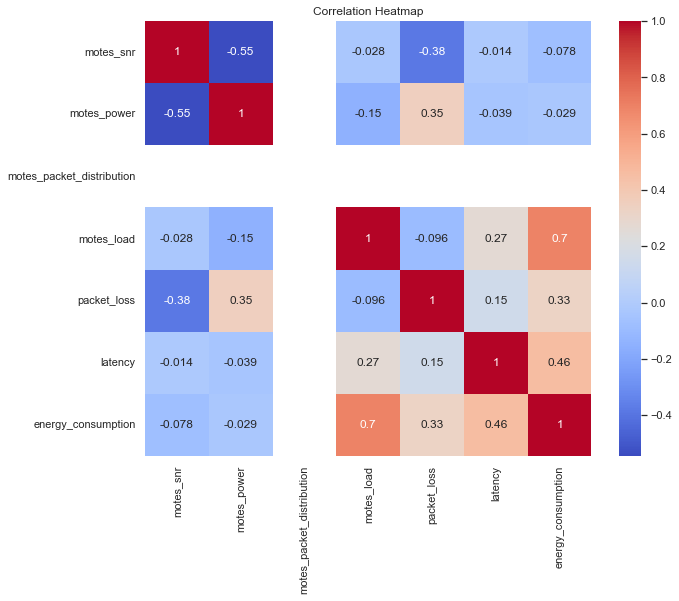

In [71]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()



In [94]:
df.describe()

,motes_snr,motes_power,motes_packet_distribution,motes_load,packet_loss,latency,energy_consumption
count,64800.000000,64800.000000,6.480000e+04,64800.000000,64800.000000,64800.000000,64800.000000
mean,-0.743725,12.734510,8.235294e+01,58.558571,11.422598,2.168793,12.945894
std,0.233940,0.272987,3.599637e-11,2.285257,3.377148,4.426123,0.154682
min,-1.764706,11.941176,8.235294e+01,57.142857,2.122195,0.000000,12.524700
25%,-0.882353,12.529412,8.235294e+01,57.142857,8.747545,0.000000,12.831500
50%,-0.705882,12.764706,8.235294e+01,57.142857,11.354100,0.200000,12.929750
75%,-0.529412,12.941176,8.235294e+01,59.071429,13.958900,1.818440,13.037200
max,-0.117647,13.352941,8.235294e+01,67.142857,22.283550,40.817000,13.569500


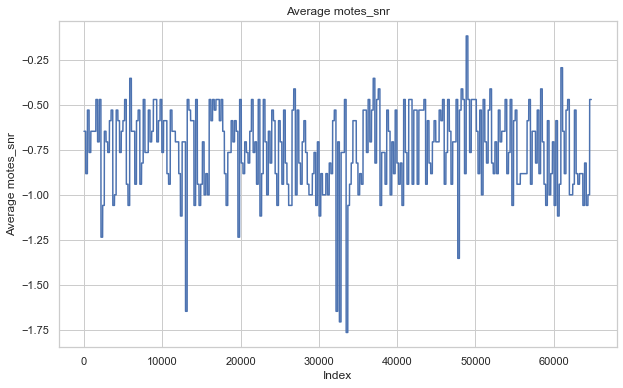

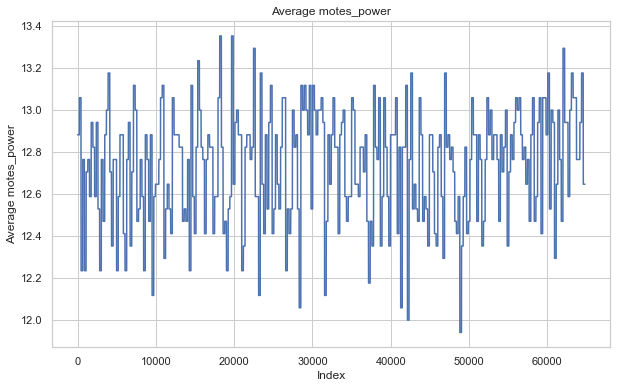

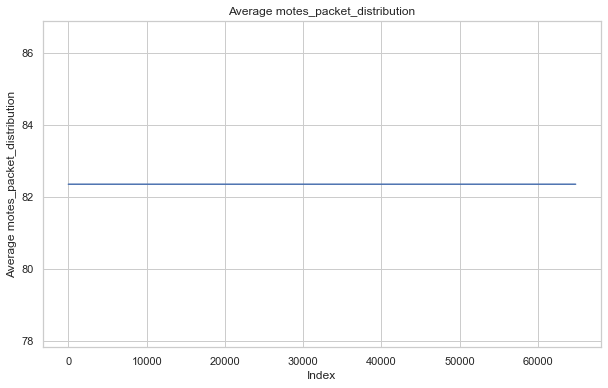

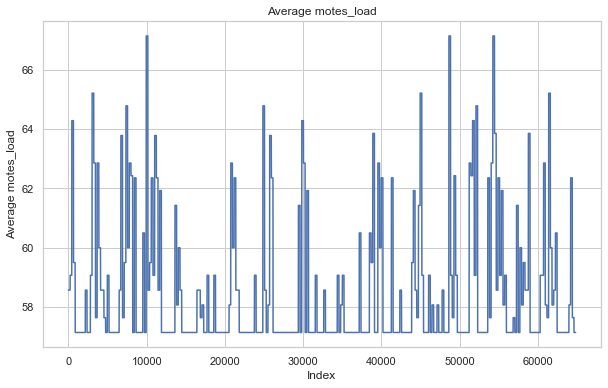

In [72]:
df['motes_snr'] = df['motes_snr'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['motes_power'] = df['motes_power'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['motes_packet_distribution'] = df['motes_packet_distribution'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['motes_load'] = df['motes_load'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

plt.figure(figsize=(10, 6))
plt.plot(df['motes_snr'].apply(lambda x: sum(x) / len(x) if isinstance(x, list) else x))
plt.xlabel('Index')
plt.ylabel('Average motes_snr')
plt.title('Average motes_snr')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['motes_power'].apply(lambda x: sum(x) / len(x) if isinstance(x, list) else x))
plt.xlabel('Index')
plt.ylabel('Average motes_power')
plt.title('Average motes_power')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['motes_packet_distribution'].apply(lambda x: sum(x) / len(x) if isinstance(x, list) else x))
plt.xlabel('Index')
plt.ylabel('Average motes_packet_distribution')
plt.title('Average motes_packet_distribution')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['motes_load'].apply(lambda x: sum(x) / len(x) if isinstance(x, list) else x))
plt.xlabel('Index')
plt.ylabel('Average motes_load')
plt.title('Average motes_load')
plt.savefig('mode_motes_packet_distribution1.png')
plt.show()


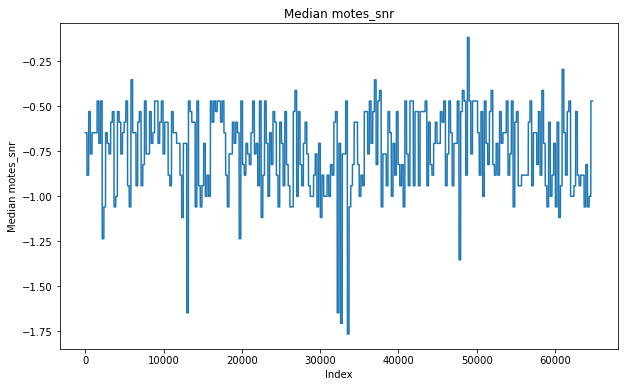

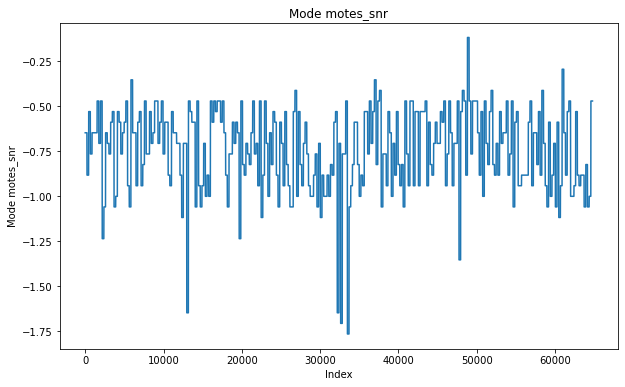

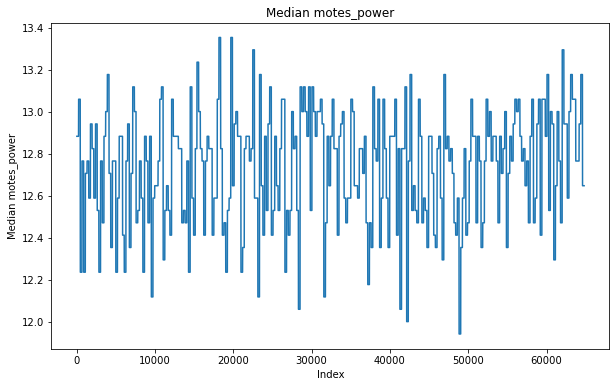

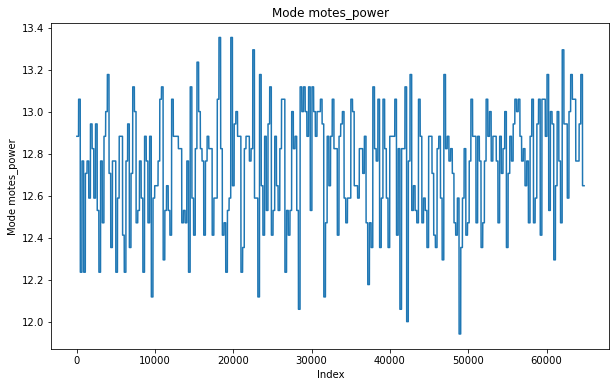

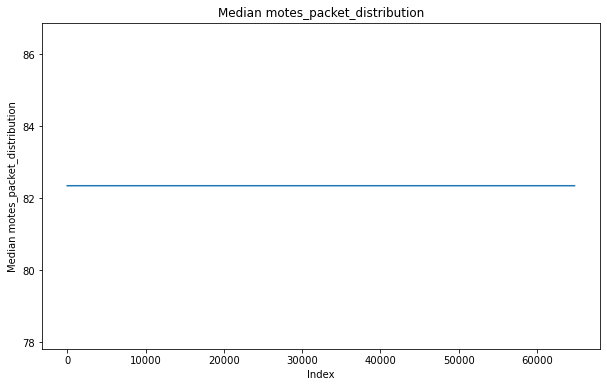

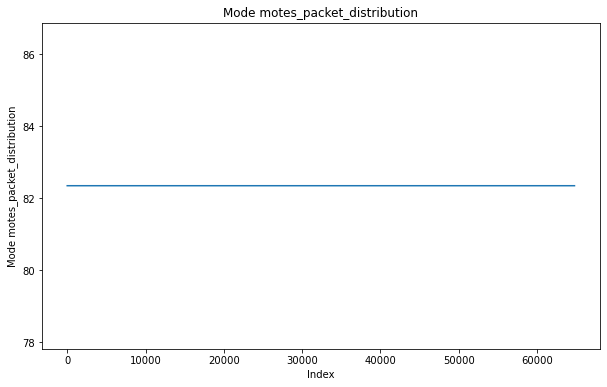

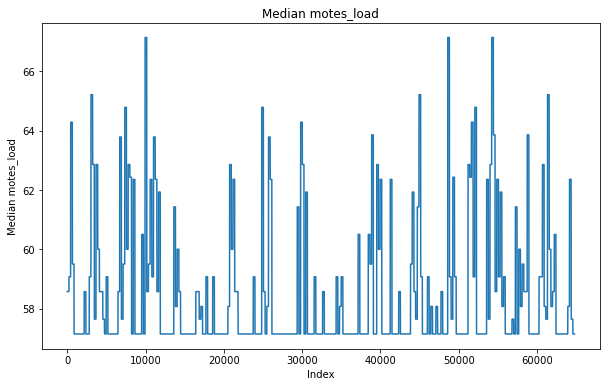

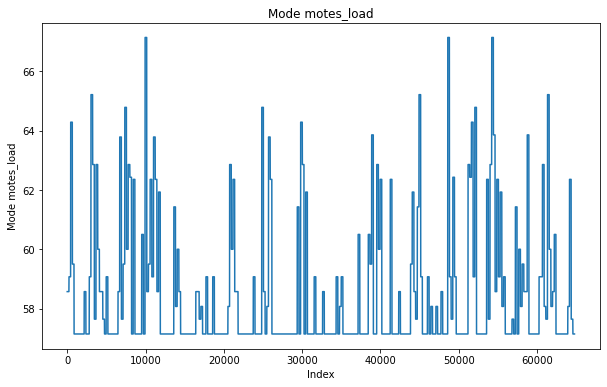

In [99]:
df['motes_snr'] = df['motes_snr'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['motes_power'] = df['motes_power'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['motes_packet_distribution'] = df['motes_packet_distribution'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df['motes_load'] = df['motes_load'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Plotting motes_snr
plt.figure(figsize=(10, 6))
plt.plot(df['motes_snr'].apply(lambda x: median(x) if isinstance(x, list) else x))
plt.xlabel('Index')
plt.ylabel('Median motes_snr')
plt.title('Median motes_snr')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['motes_snr'].apply(lambda x: mode(x) if isinstance(x, list) else x))
plt.xlabel('Index')
plt.ylabel('Mode motes_snr')
plt.title('Mode motes_snr')
plt.show()

# Plotting motes_power
plt.figure(figsize=(10, 6))
plt.plot(df['motes_power'].apply(lambda x: median(x) if isinstance(x, list) else x))
plt.xlabel('Index')
plt.ylabel('Median motes_power')
plt.title('Median motes_power')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['motes_power'].apply(lambda x: mode(x) if isinstance(x, list) else x))
plt.xlabel('Index')
plt.ylabel('Mode motes_power')
plt.title('Mode motes_power')
plt.show()

# Plotting motes_packet_distribution
plt.figure(figsize=(10, 6))
plt.plot(df['motes_packet_distribution'].apply(lambda x: median(x) if isinstance(x, list) else x))
plt.xlabel('Index')
plt.ylabel('Median motes_packet_distribution')
plt.title('Median motes_packet_distribution')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['motes_packet_distribution'].apply(lambda x: mode(x) if isinstance(x, list) else x))
plt.xlabel('Index')
plt.ylabel('Mode motes_packet_distribution')
plt.title('Mode motes_packet_distribution')
plt.show()

# Plotting motes_load
plt.figure(figsize=(10, 6))
plt.plot(df['motes_load'].apply(lambda x: median(x) if isinstance(x, list) else x))
plt.xlabel('Index')
plt.ylabel('Median motes_load')
plt.title('Median motes_load')
plt.savefig('mode_motes_packet_distribution.png')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df['motes_load'].apply(lambda x: mode(x) if isinstance(x, list) else x))
plt.xlabel('Index')
plt.ylabel('Mode motes_load')
plt.title('Mode motes_load')
plt.show()


In [1]:
def ucb1(values, counts, total_counts, c=2.0):
    num_arms = len(values)
    ucb_values = np.zeros(num_arms)

    for arm in range(num_arms):
        if counts[arm] == 0:
            ucb_values[arm] = np.inf
        else:
            exploration_term = np.sqrt(np.log(total_counts) / counts[arm])
            ucb_values[arm] = values[arm] + c * exploration_term

    best_arm = np.argmax(ucb_values)
    return best_arm

In [2]:
def epsilon_greedy(values, counts, epsilon):
    num_arms = len(values)
    
    if np.random.random() < epsilon:
        chosen_arm = np.random.choice(num_arms)
    else:
        best_arm = np.argmax(values)
        chosen_arm = best_arm
    
    return chosen_arm